## 2.1 Import all necessary libraries

In [ ]:
#imports
# data preprocessing
import pandas as pd
import numpy as np

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Load the data "palmerpenguinscsv" from a URL into a Pandas DataFrame.

```python
        url = "https://bit.ly/palmerpenguinscsv"
```

In [ ]:
# load
url = "https://bit.ly/palmerpenguinscsv"
df = pd.read_csv(url)

df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## 2.3 Inpect the data frame

* Look inside
* Inspect the the dataframe for missing values.
* Check the summary statics of the numerical columns (mean, min, max, etc)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


## 2.4 Remove any rows with missing values from the DataFrame.

In [ ]:
df = df.dropna(axis=0)

df.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## 2.5 How did it change things?

1. Check that after removal of missing value (rows) the data is largely intact.
1. Check that the statisics did not change drastically.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [ ]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,174.324324,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,98.386547,5.468668,1.969235,14.015765,805.215802,0.812944
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,90.000000,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,173.000000,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,259.000000,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


<center> Since dropping a total of 11 rows out of 343 because of missing values, there is expectedly not much of a difference between the statistics before and after the drop. We expect this because we are only dropping a small fraction of the total data, that the statistics are close enough to each other to treat them the same. </center>

## 2.6 Exctracting Numerical Values

Extract the species as "y" and the 4 numerical columns and all rows as "X" into numpy arrays

In [ ]:
# splitting df into X and y sets
X = df.drop(['rowid', 'species', 'island', 'sex', 'year'], axis=1)
y = df['species']

X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

## 2.7 Split the data 

Split the data inot into training and test sets with 33% of the data for testing and random state 42.

In [ ]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 2.8 Building the accuracies vs complexity 

1. Define two lists empty lists to store the accuracy scores for the training and test sets
1. Set up a loop iterating through the values in the range of neighbors starting at 1 neighbor and going to 35 neighbors.
1. For each value of "K", train a KNN classifier using the training data. 
1. Within the loop, for each value of "K", predict using the training data.
1. Within the loop, for each value of "K", predict using the testing data.
1. Within the loop, for each value of "K", compute the accuracy of the prediction against the training data (accuracy_score)
1. Within the loop, for each value of "K", append to the training accuracies
1. Within the loop, for each value of "K", compute the accuracy of the prediction against the testing data (accuracy_score)
1. Within the loop, for each value of "K", append to the testing accuracies

In [ ]:
train_accuracies = []
test_accuracies = []

# Creating the data for the train-test curves
for n_neighbors in range(36):
  n_neighbors += 1
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  # training
  knn.fit(X_train, y_train)
  train_predictions = knn.predict(X_train)
  train_score = accuracy_score(y_train, train_predictions)
  train_accuracies.append(train_score)
  # testing
  knn.fit(X_test, y_test)
  test_predictions = knn.predict(X_test)
  test_score = accuracy_score(y_test, test_predictions)
  test_accuracies.append(test_score)


## 2.9 Graphing and Analyzing the train-test-accuracy curves

1. Plot the values in the lists of training and test accuracies curves against the corresponding values in the range of neighbors from 1 to 35
1. The curves should be in two different colors with a legend so we know which is training and which is testing.
1. Make sure that the axis are labeled by the quanities and units shown on that axis.
1. Make sure there is a title which says 'Training and Test Accuracies'

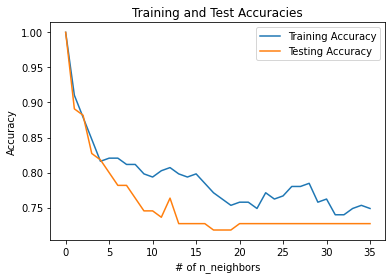

In [ ]:
fig, ax = plt.subplots()
# Plot results
ax.plot(train_accuracies, label='Training Accuracy')
ax.plot(test_accuracies, label='Testing Accuracy')

# labels
plt.title('Training and Test Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('# of n_neighbors')
plt.legend()

plt.show()

## 3.0 Explanation

In this cell explain how the figure above reveals in terms of underfit and overfit. How many neighbors should we use?

<center> In the above figure we can see that the training accuracy remains above the testing accuracy, but both seem to converge to the same range of values. This means that the model is performing more accurately on our testing set compared to the training which could indicate underfitting.
<br> </br>
In terms of the optimal n_neighbors, we want to see where the biggest drop or saddle point of these graphs remain. According to me, I believe the KNN model should optimally work 10 n_neighbors. </center>